## Getting some insight of data


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns ##i'm using this for some pretty awesome and easy plots like corr plot

Listing all the filled form the directory and choosing one for analysis

In [8]:
data_folder = "../../data/sample_data1"

all_files = os.listdir(data_folder)

## Listing only csv and excel files and irgnoring any checkpoint, markdowm or txt file
all_files = [x for x in all_files if x[-3:] == "csv" or x[-4] == "xlsx" or x[-3:] == 'xls' ]
all_files

['22306_24.65_73.75_2000.csv',
 '22306_24.65_73.75_2001.csv',
 '22306_24.65_73.75_2002.csv',
 '22306_24.65_73.75_2003.csv',
 '22306_24.65_73.75_2004.csv',
 '22306_24.65_73.75_2005.csv',
 '22306_24.65_73.75_2006.csv',
 '22306_24.65_73.75_2007.csv',
 '22306_24.65_73.75_2008.csv',
 '22306_24.65_73.75_2009.csv',
 '22306_24.65_73.75_2010.csv',
 '22306_24.65_73.75_2011.csv',
 '22306_24.65_73.75_2012.csv',
 '22306_24.65_73.75_2013.csv',
 '22306_24.65_73.75_2014.csv']

In [9]:
df = pd.read_csv(os.path.join(data_folder,all_files[0]))
df.head()

Source Location ID City State Country Latitude Longitude Time Zone  \
0   SUNY       22306    -     -   India    24.65     73.75       5.5   
1   Year       Month  Day  Hour  Minute      DHI       DNI       GHI   
2   2000           1    1     0      30        0         0         0   
3   2000           1    1     1      30        0         0         0   
4   2000           1    1     2      30        0         0         0   

      Elevation Local Time Zone  ... Wind Direction Units Wind Speed  \
0             0             5.5  ...              Degrees        m/s   
1  Clearsky DHI    Clearsky DNI  ...                  NaN        NaN   
2             0               0  ...                  NaN        NaN   
3             0               0  ...                  NaN        NaN   
4             0               0  ...                  NaN        NaN   

  Snow Depth Units Fill Flag 0    Fill Flag 1     Fill Flag 2  \
0                m         NaN  Missing Image  Low Irradiance   
1              NaN         NaN            NaN             NaN   
2              NaN         NaN            NaN             NaN   
3              NaN         NaN            NaN             NaN   
4              NaN         NaN            NaN             NaN   

        Fill Flag 3               Fill Flag 4         Fill Flag 5  Version  
0  Exceeds Clearsky  Missing CLoud Properties  Rayleigh Violation  unknown  
1               NaN                       NaN                 NaN      NaN  
2               NaN                       NaN                 NaN      NaN  
3               NaN                       NaN                 NaN      NaN  
4               NaN                       NaN                 NaN      NaN  

[5 rows x 35 columns]

Data in the table is for the region near to udaipur (lat=24.65,log=73.68)

Selecting the season in 2000 from jan to dec <br>

Extracting the meta data from the csv if exists, as you see the are two rows in the above dataframe the have now contribution to the actual data

### Tutorial
DataFrame**.iloc :** <br>
ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [48]:
## get above to rows

first_row = df.columns ## as the top row represents the header of the dataframe
#function .iloc and .loc
second_row = df.iloc[[0]]

In [49]:
## constructing the actual data dataframe

new_header = df.iloc[1] 
new_df = df[2:]
new_df.columns = new_header
new_df.head()

# year = year_all.loc[:, year_all.columns.notnull()]
# day_of_year = year_all.pop('Day')
# new_columns

1  Year Month Day Hour Minute DHI DNI GHI Clearsky DHI Clearsky DNI  ...  NaN  \
2  2000     1   1    0     30   0   0   0            0            0  ...  NaN   
3  2000     1   1    1     30   0   0   0            0            0  ...  NaN   
4  2000     1   1    2     30   0   0   0            0            0  ...  NaN   
5  2000     1   1    3     30   0   0   0            0            0  ...  NaN   
6  2000     1   1    4     30   0   0   0            0            0  ...  NaN   

1  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 35 columns]

In [50]:
# Analysing the header to get idea about type of data stored in each column

print(new_df.columns)

Index([              'Year',              'Month',                'Day',
                     'Hour',             'Minute',                'DHI',
                      'DNI',                'GHI',       'Clearsky DHI',
             'Clearsky DNI',       'Clearsky GHI',          'Dew Point',
              'Temperature',           'Pressure',  'Relative Humidity',
       'Solar Zenith Angle', 'Precipitable Water',         'Snow Depth',
           'Wind Direction',         'Wind Speed',          'Fill Flag',
                        nan,                  nan,                  nan,
                        nan,                  nan,                  nan,
                        nan,                  nan,                  nan,
                        nan,                  nan,                  nan,
                        nan,                  nan],
      dtype='object', name=1)


### Knowing more about data
From header we got term like DHI, GHI, etc. now what the hack these terms mean<br>
So,<br>
***GHI :*** Global horizontal Irradiance<br>
***DHI :*** Direct horizontal Irradiance<br>
***DNI :*** Direct Normal Irradiance<br>
<img src="../../data/sample_data1/img/img1.png">
<center> ref : <a href="https://firstgreenconsulting.wordpress.com/2012/04/26/differentiate-between-the-dni-dhi-and-ghi/">https://firstgreenconsulting.wordpress.com/2012/04/26/differentiate-between-the-dni-dhi-and-ghi/</a> </center>

<br>
The ? in the image shows the Solar Zenith angle


In [51]:
## As you can see there are many irrelevent columns in the dataframe that we actually doesn't need
## for example all nan valued columns the minute column because each interval is same 
## so, we are going to drop all these columns

# first droping the all not nan columns
new_df = new_df.loc[:, new_df.columns.notnull()] # this function check the columns head if it is not null(nan) then slice otherwise drops

# droping fill flag, minute and year columns
new_df = new_df.drop(columns=['Year', 'Minute', 'Fill Flag'])

In [1]:
## seperating the data into two dataframes 
## 1. not the measured values(ex: month,day,minute)
## 2. measured values(ex: temperatue, ghis,etc)
new_df.to_csv('../../filtered_data_file/2000_main_data.csv',index=False)
new_df_not_imp = new_df.loc[:,['Month','Day','Hour']]
new_df_imp = new_df.drop(columns=['Month','Day','Hour'])

NameError: name 'new_df' is not defined

### Now the weird part started
Analysing the data

In [63]:
# I'm doing my complete analysis for important data (new_df_imp)

new_df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 2 to 8761
Data columns (total 15 columns):
DHI                   8760 non-null object
DNI                   8760 non-null object
GHI                   8760 non-null object
Clearsky DHI          8760 non-null object
Clearsky DNI          8760 non-null object
Clearsky GHI          8760 non-null object
Dew Point             8760 non-null object
Temperature           8760 non-null object
Pressure              8760 non-null object
Relative Humidity     8760 non-null object
Solar Zenith Angle    8760 non-null object
Precipitable Water    8760 non-null object
Snow Depth            8760 non-null object
Wind Direction        8760 non-null object
Wind Speed            8760 non-null object
dtypes: object(15)
memory usage: 1.0+ MB


### ---------------------------------------------------------------------------------------------------------------------
So, the data frame contains the **15 columns** and **8760 rows** <br>
but if you look at the **object** written at the end of each line will cause the problem for may upcoming functions so, we need to get ride of that object.<br>

As the each entry in columns should be a number, hence we need to convert it to foating value for more info visit [here](https://stackoverflow.com/questions/16729483/converting-strings-to-floats-in-a-dataframe)

In [70]:
## converting to floating value data point
new_df_imp = new_df_imp.astype('float64')
new_df_imp.describe()

1              DHI          DNI          GHI  Clearsky DHI  Clearsky DNI  \
count  8760.000000  8760.000000  8760.000000   8760.000000   8760.000000   
mean     84.209817   234.421918   239.753311     75.877740    292.425228   
std     107.486084   317.615620   319.141178     92.220078    341.807336   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     0.000000      0.000000      0.000000   
50%       1.000000     0.000000     1.000000      7.000000      8.500000   
75%     161.000000   551.000000   484.000000    148.000000    659.000000   
max     528.000000   930.000000  1024.000000    348.000000    948.000000   

1      Clearsky GHI    Dew Point  Temperature     Pressure  Relative Humidity  \
count   8760.000000  8760.000000  8760.000000  8760.000000        8760.000000   
mean     268.777626     7.222603    25.827982   953.414543          42.707978   
std      344.358383    13.610923     7.426018     4.981641          31.423496   
min        0.000000   -51.000000     4.936794   940.202393           0.111010   
25%        0.000000    -5.000000    21.306916   949.361847          14.810881   
50%        5.000000     8.000000    25.731618   953.771057          32.012183   
75%      591.000000    21.000000    30.231934   957.390381          72.493850   
max     1044.000000    26.000000    46.924406   966.045898         100.000000   

1      Solar Zenith Angle  Precipitable Water  Snow Depth  Wind Direction  \
count         8760.000000         8760.000000      8760.0     8760.000000   
mean            89.790747            2.207073         0.0      202.766769   
std             43.192900            1.683985         0.0      103.005115   
min              1.826194            0.180984         0.0        0.052361   
25%             53.440433            0.721060         0.0       91.777796   
50%             89.097390            1.562343         0.0      244.847015   
75%            126.546265            3.425686         0.0      271.580559   
max            178.690587            6.391799         0.0      359.988739   

1       Wind Speed  
count  8760.000000  
mean      2.636871  
std       1.190847  
min       0.038557  
25%       1.706553  
50%       2.609862  
75%       3.479010  
max       6.321243

### Simple Line plot to look on to the data 
noe use at all

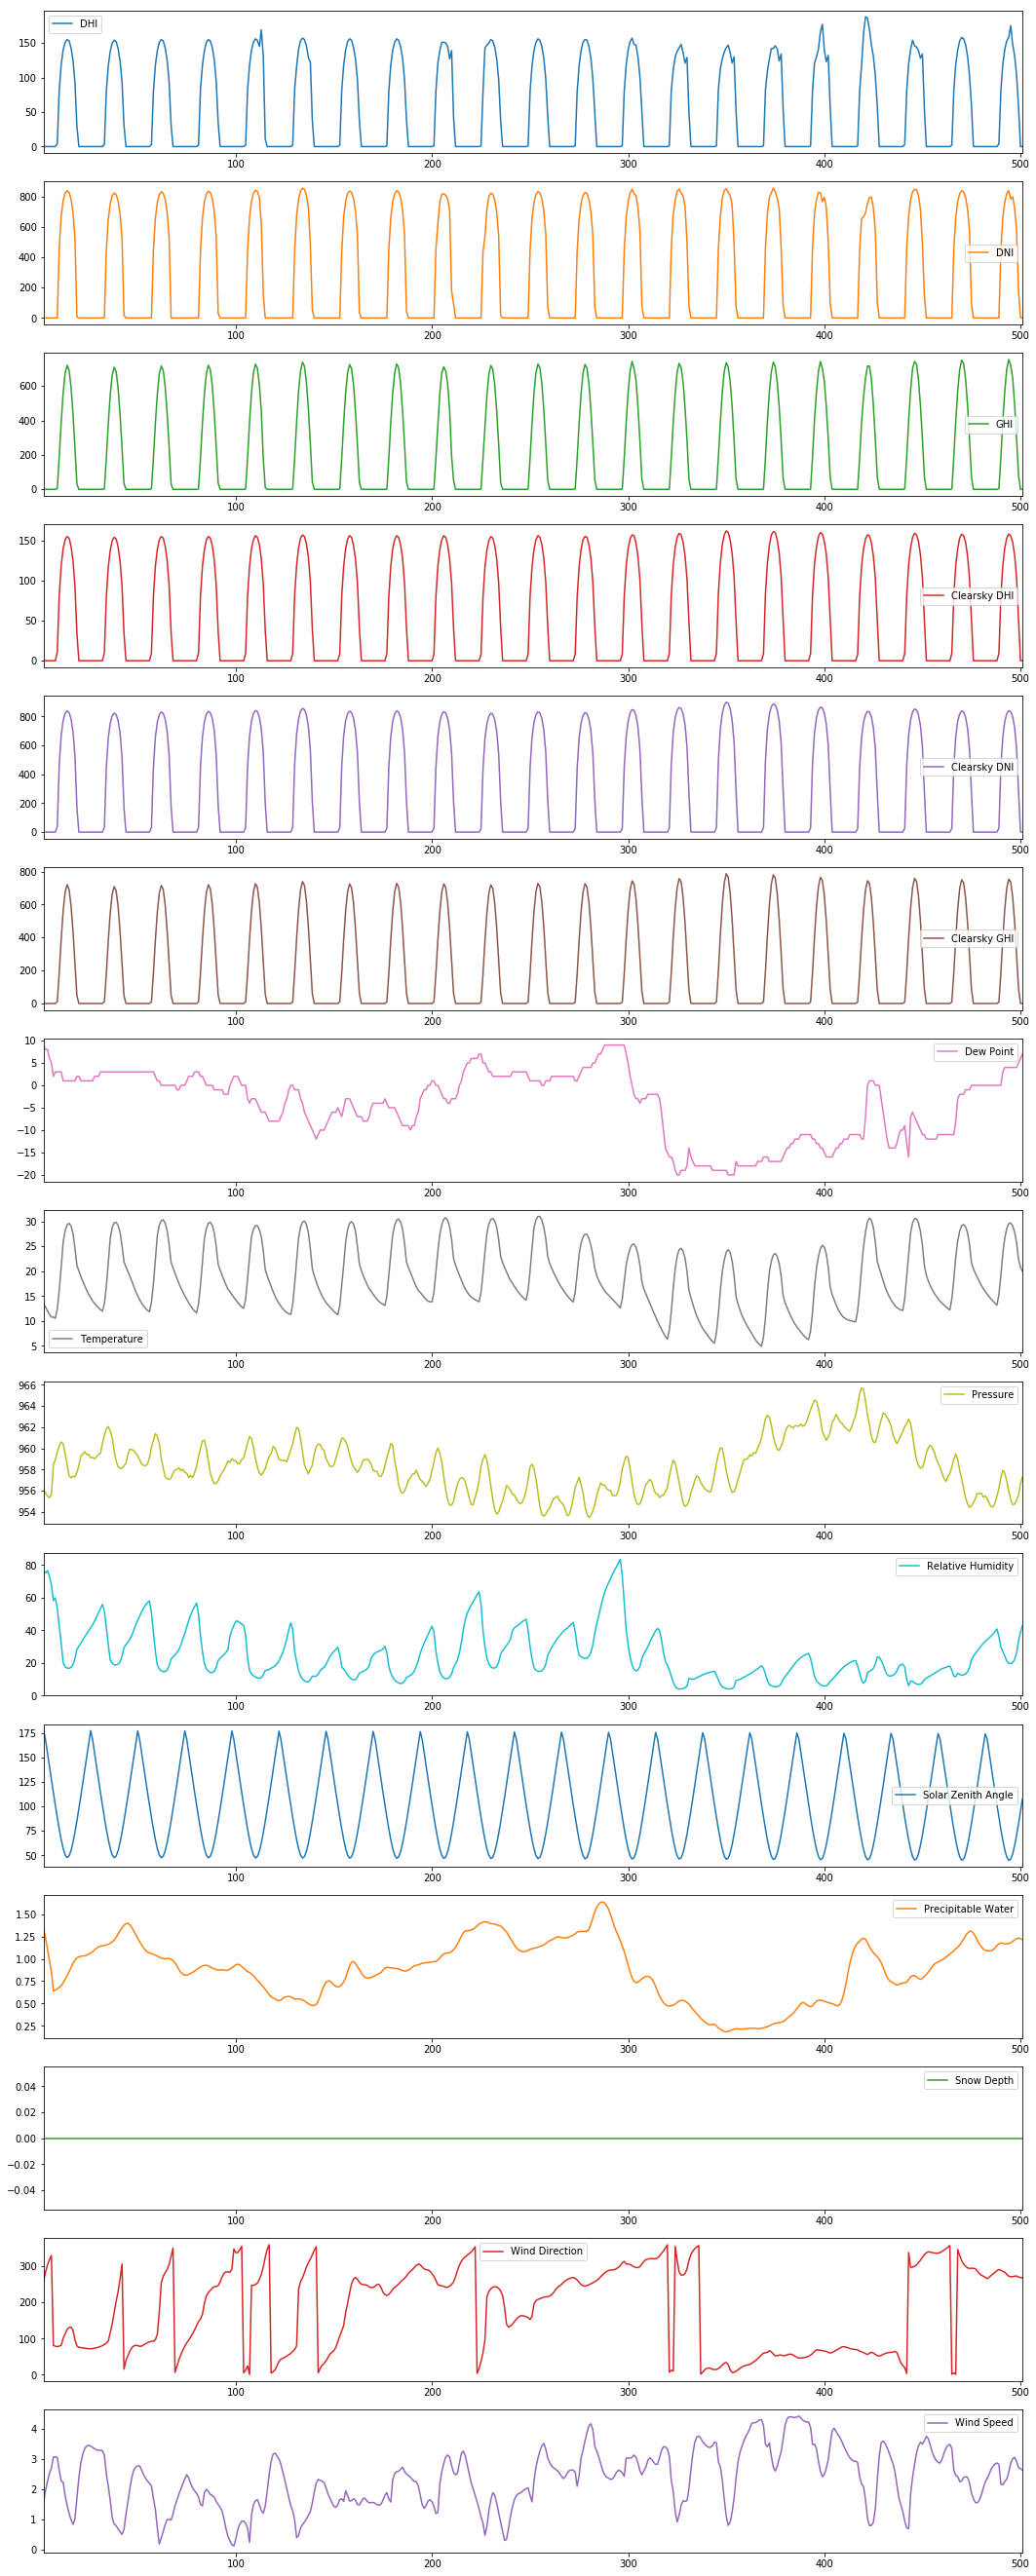

In [93]:
## Simple 100 values plot aroud for 4 days data

df_plot = new_df_imp[0:500]
fig, ax = plt.subplots(figsize=(18,48))
df_plot.plot(ax=ax,subplots=True)
ax.grid(False)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
plt.show()

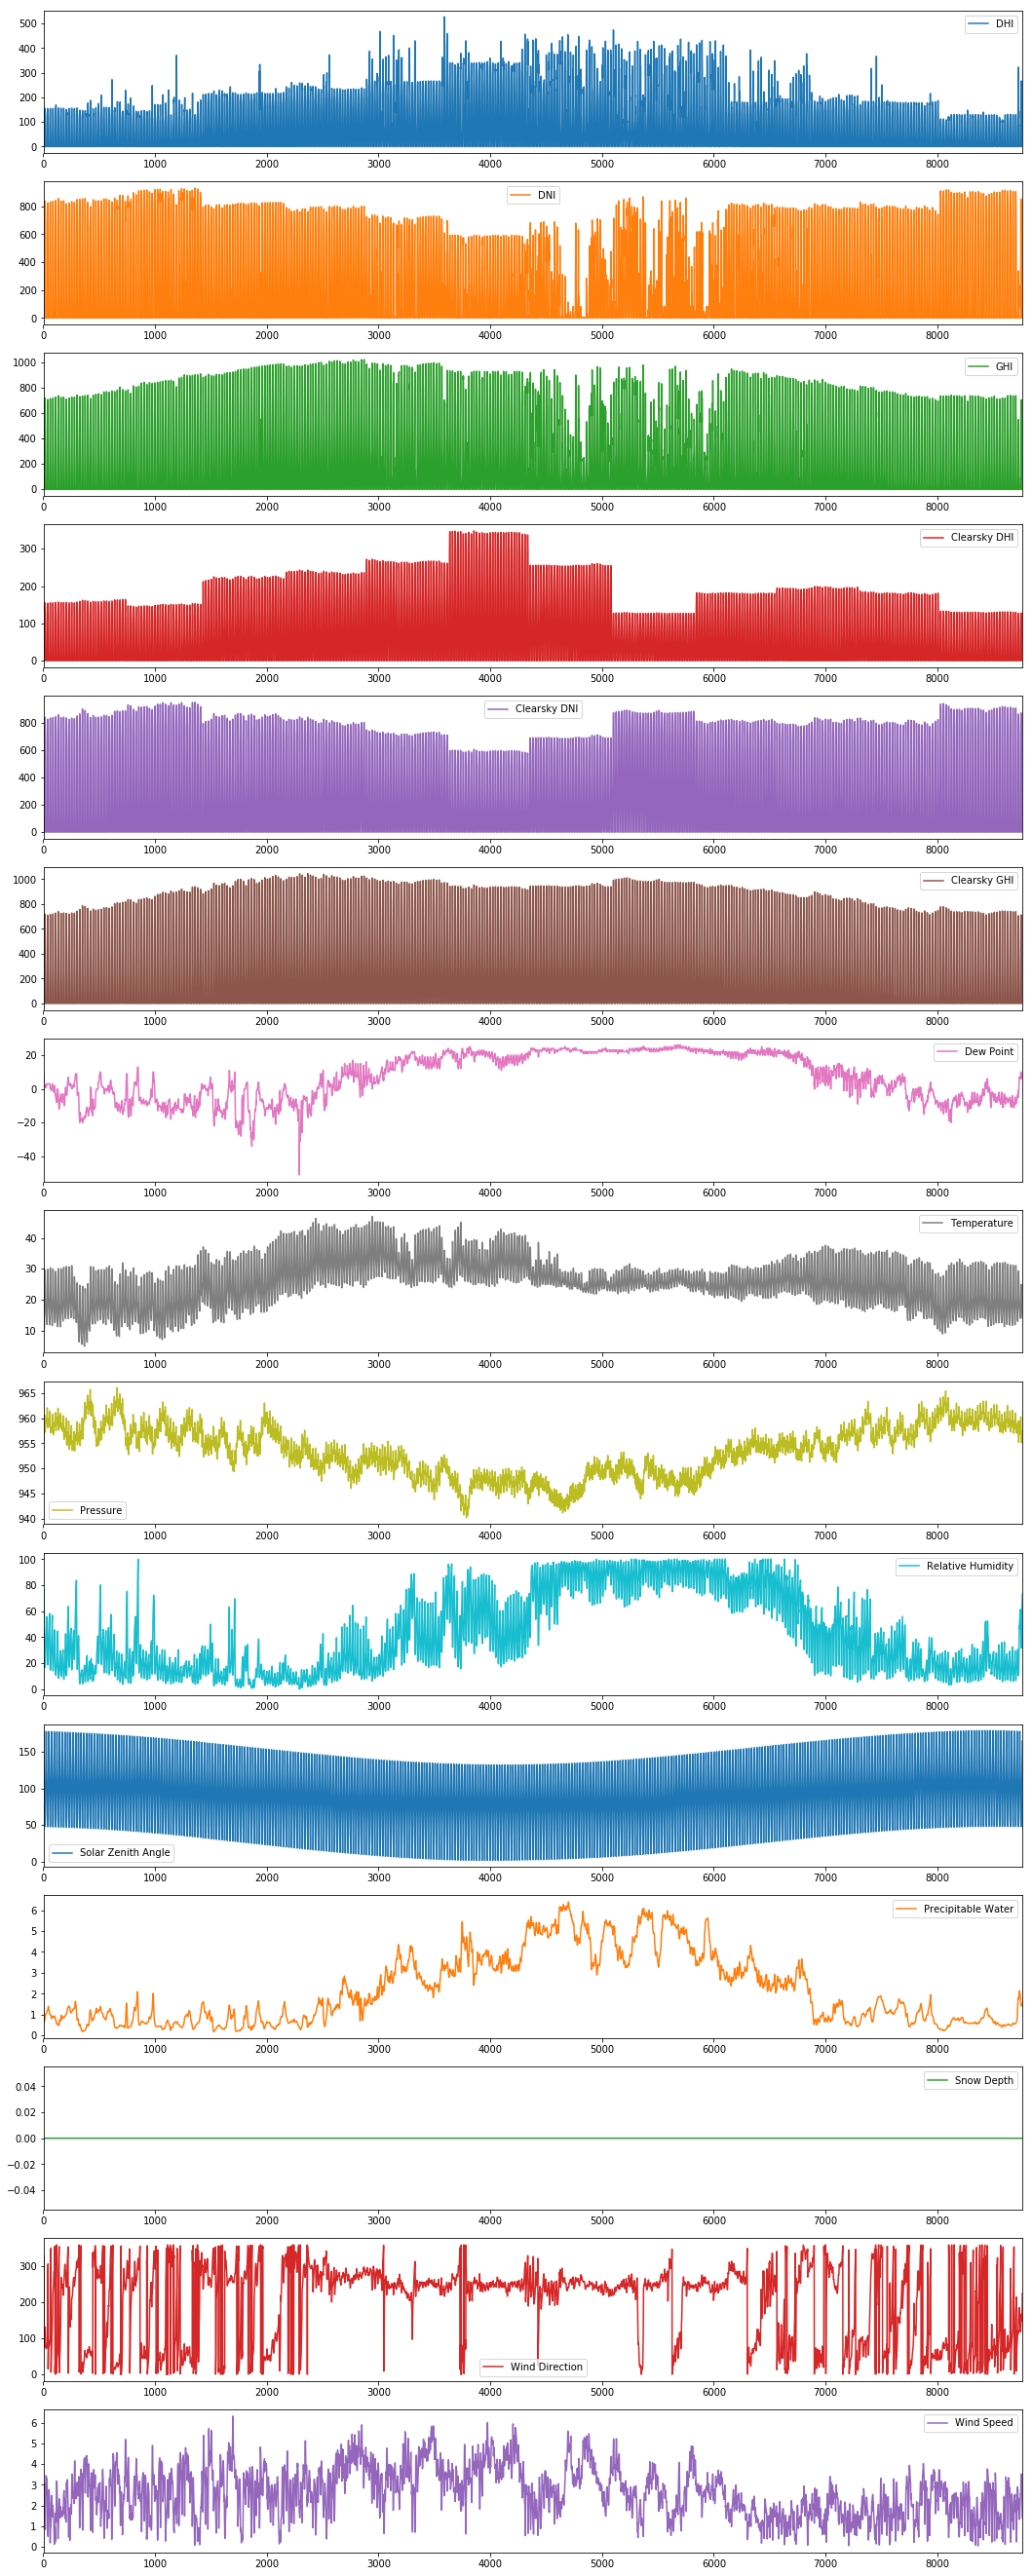

In [81]:
## Simple 100 values plot aroud for 4 days data

df_plot = new_df_imp
fig, ax = plt.subplots(figsize=(18,48))
df_plot.plot(ax=ax,subplots=True)
ax.grid(False)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
plt.show()

Lets Split data into three segement before rainy, rainy, after rainy, using simple precipitation graph analysis


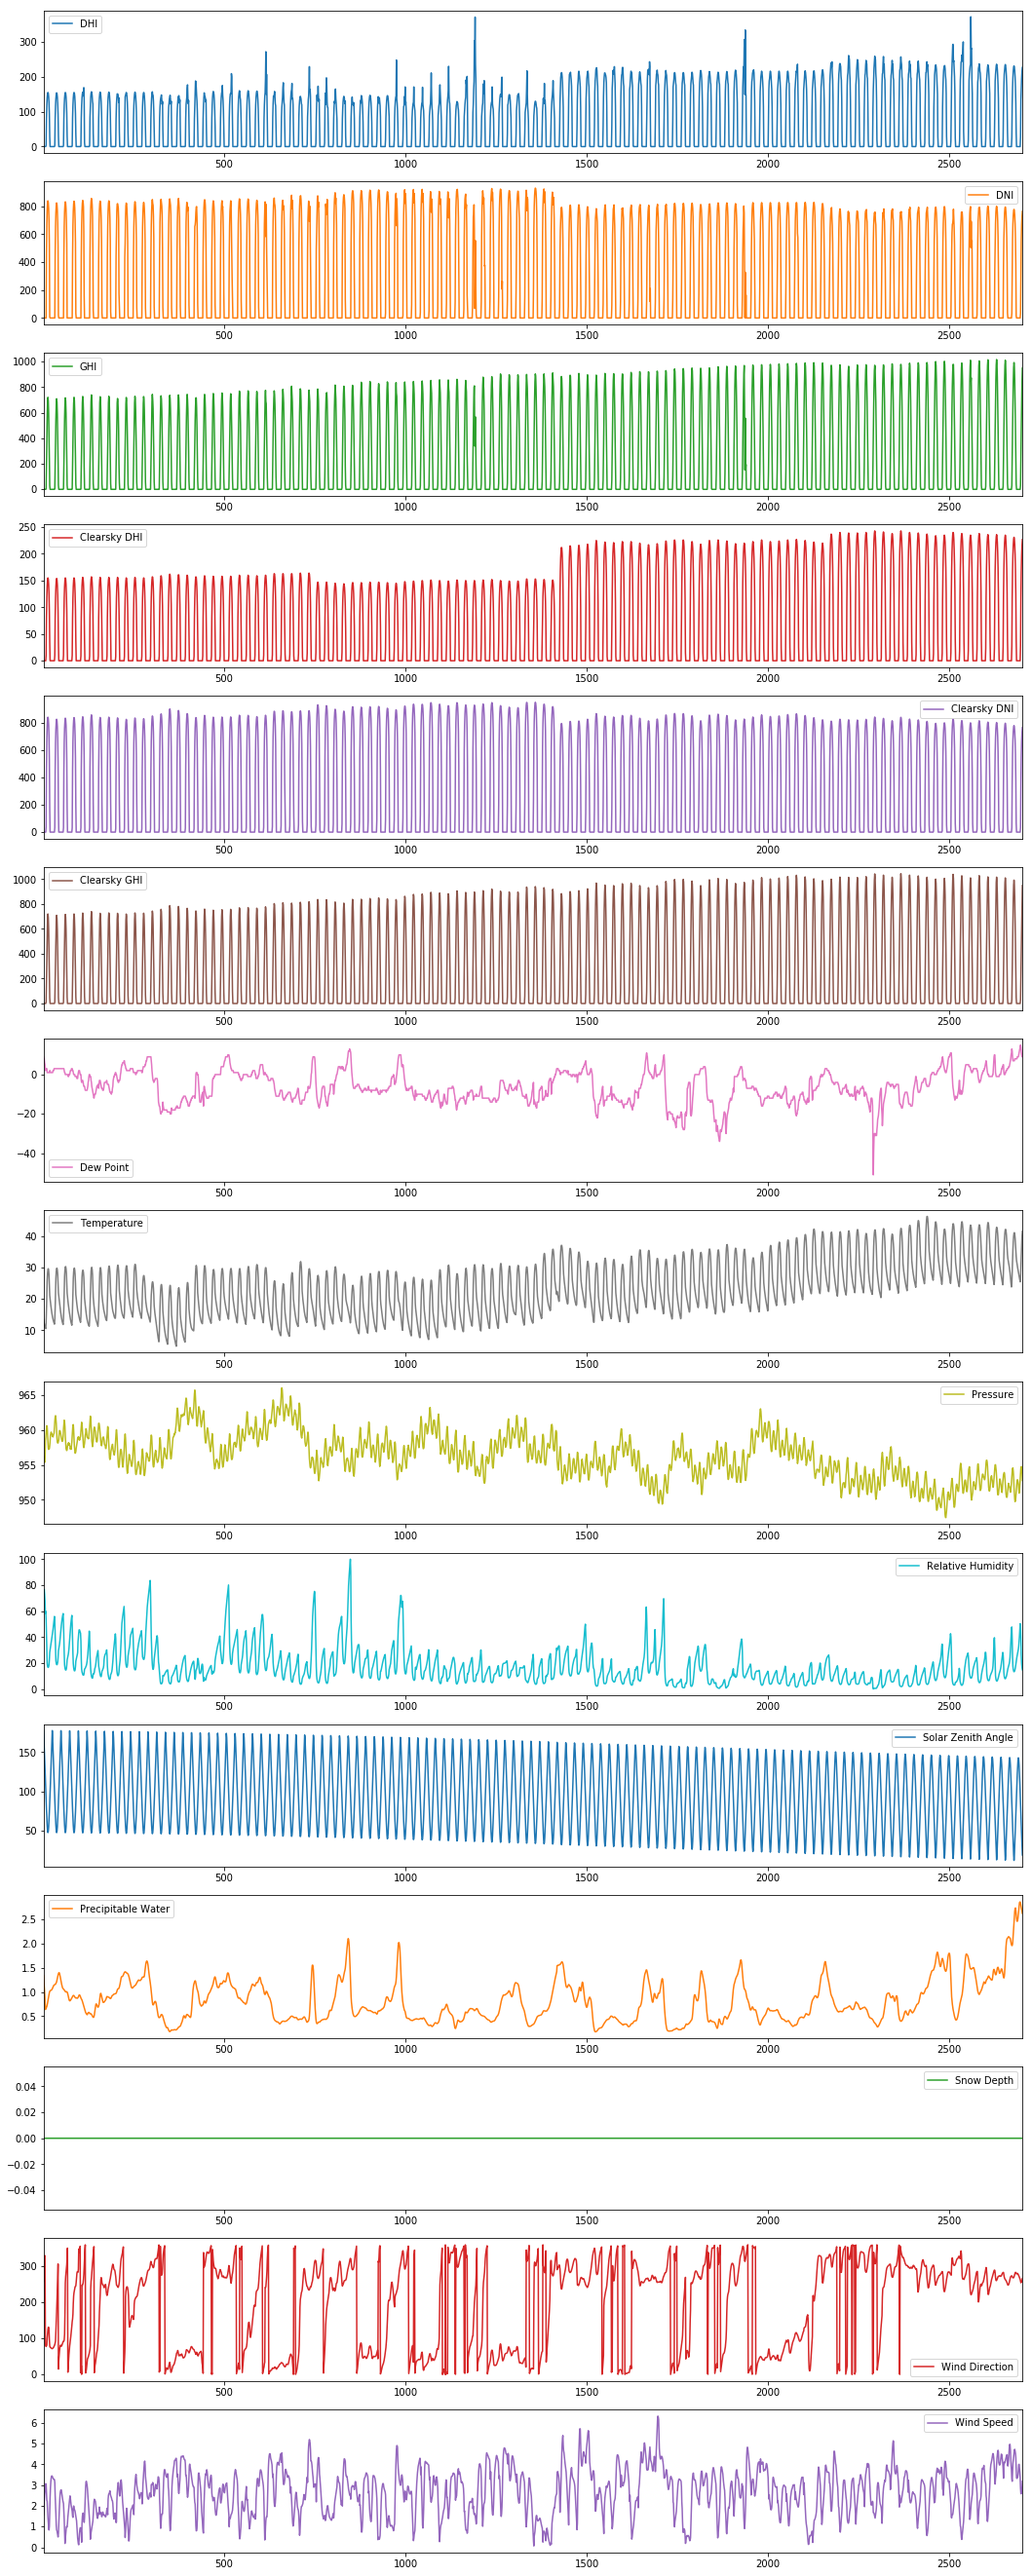

In [83]:
df_plot = new_df_imp[:2700]
fig, ax = plt.subplots(figsize=(18,48))
df_plot.plot(ax=ax,subplots=True)
ax.grid(False)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
plt.show()

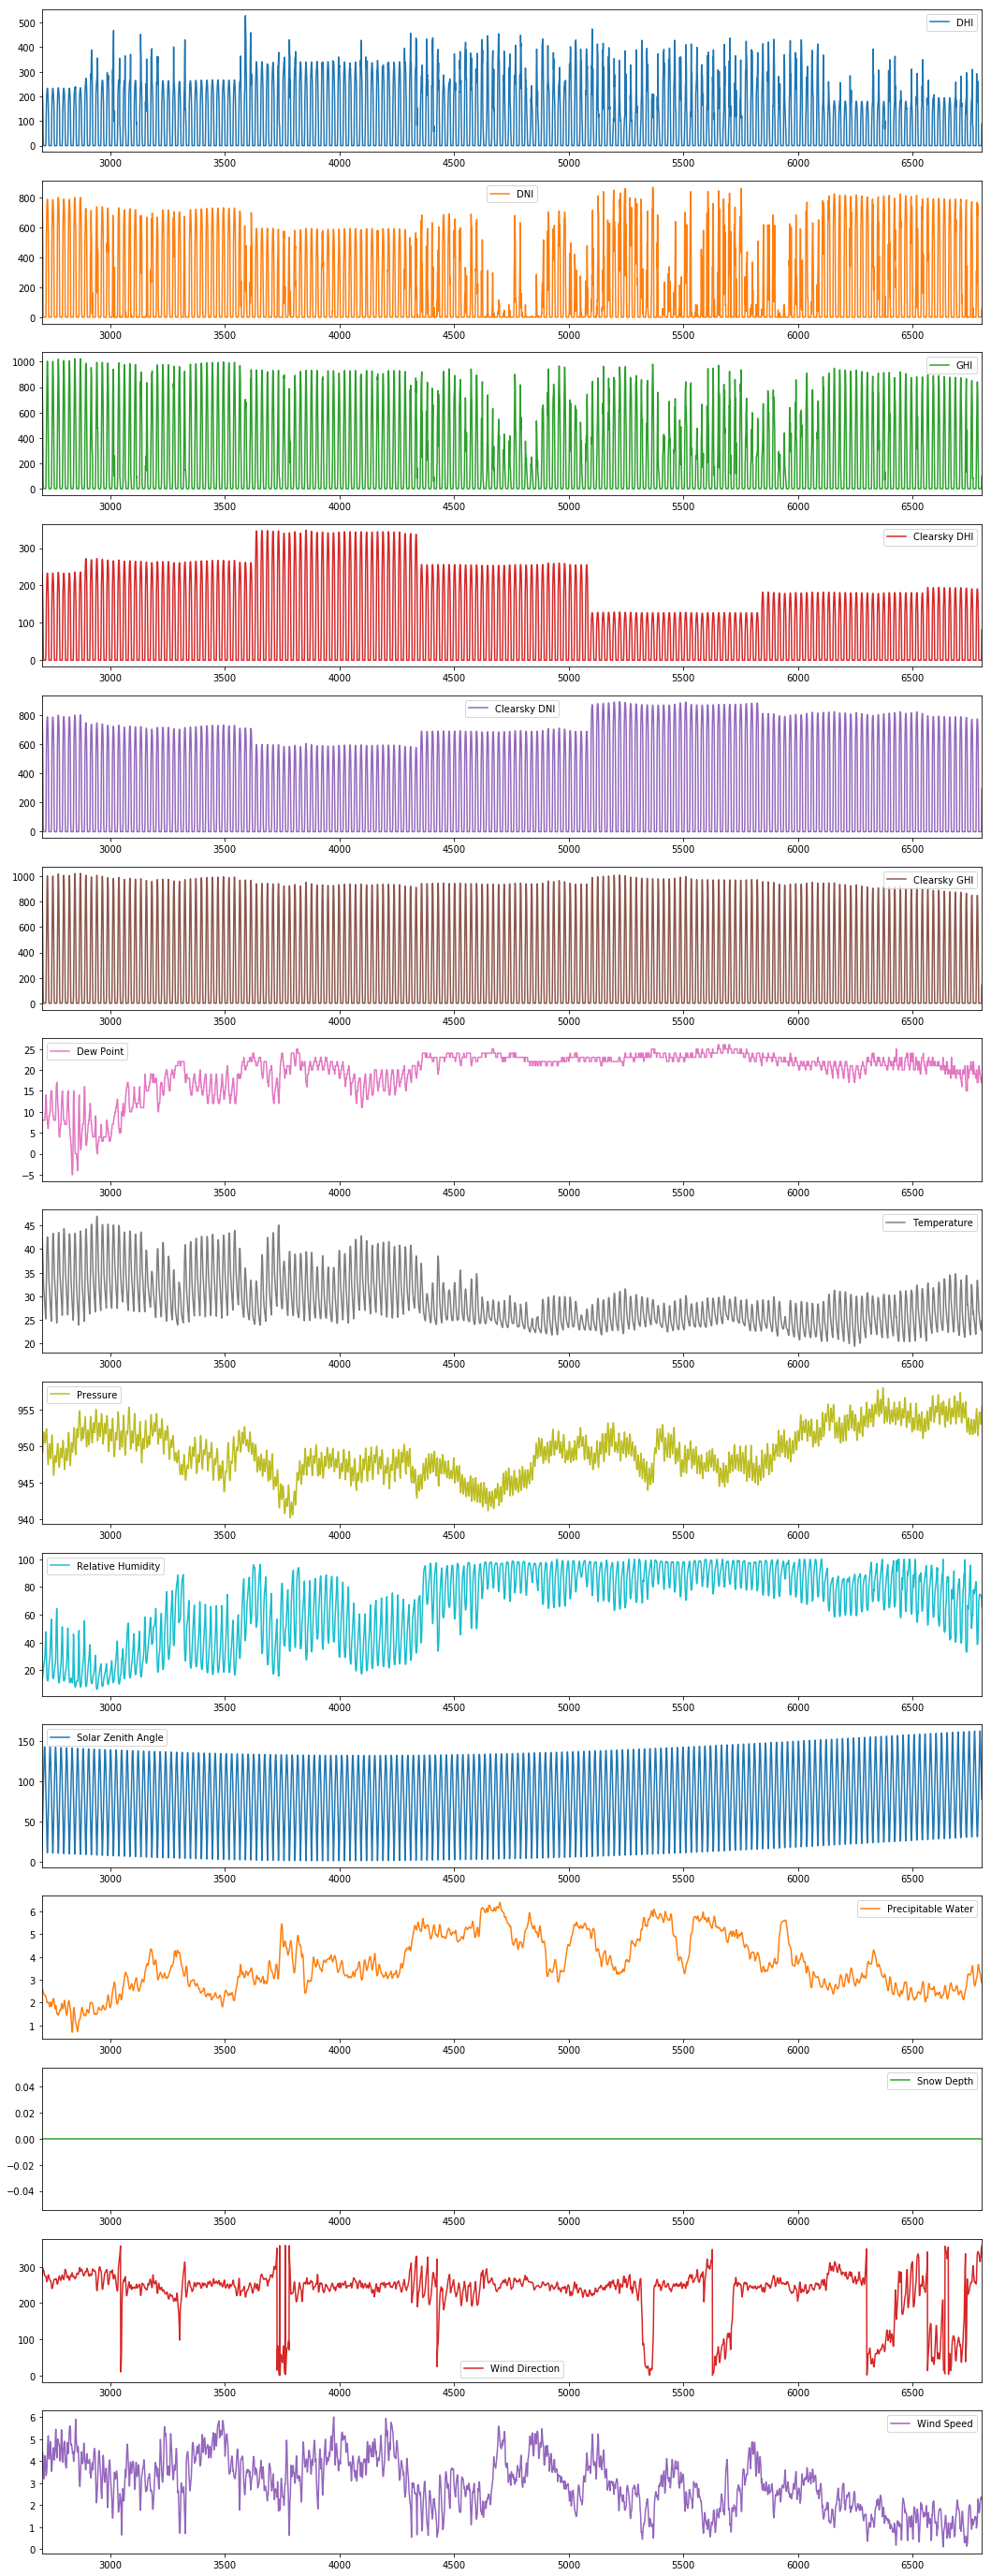

In [92]:
# Rainy season plot

df_plot = new_df_imp[2700:6800]
fig, ax = plt.subplots(figsize=(18,50))
df_plot.plot(ax=ax, subplots=True)
ax.grid(False)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
plt.show()

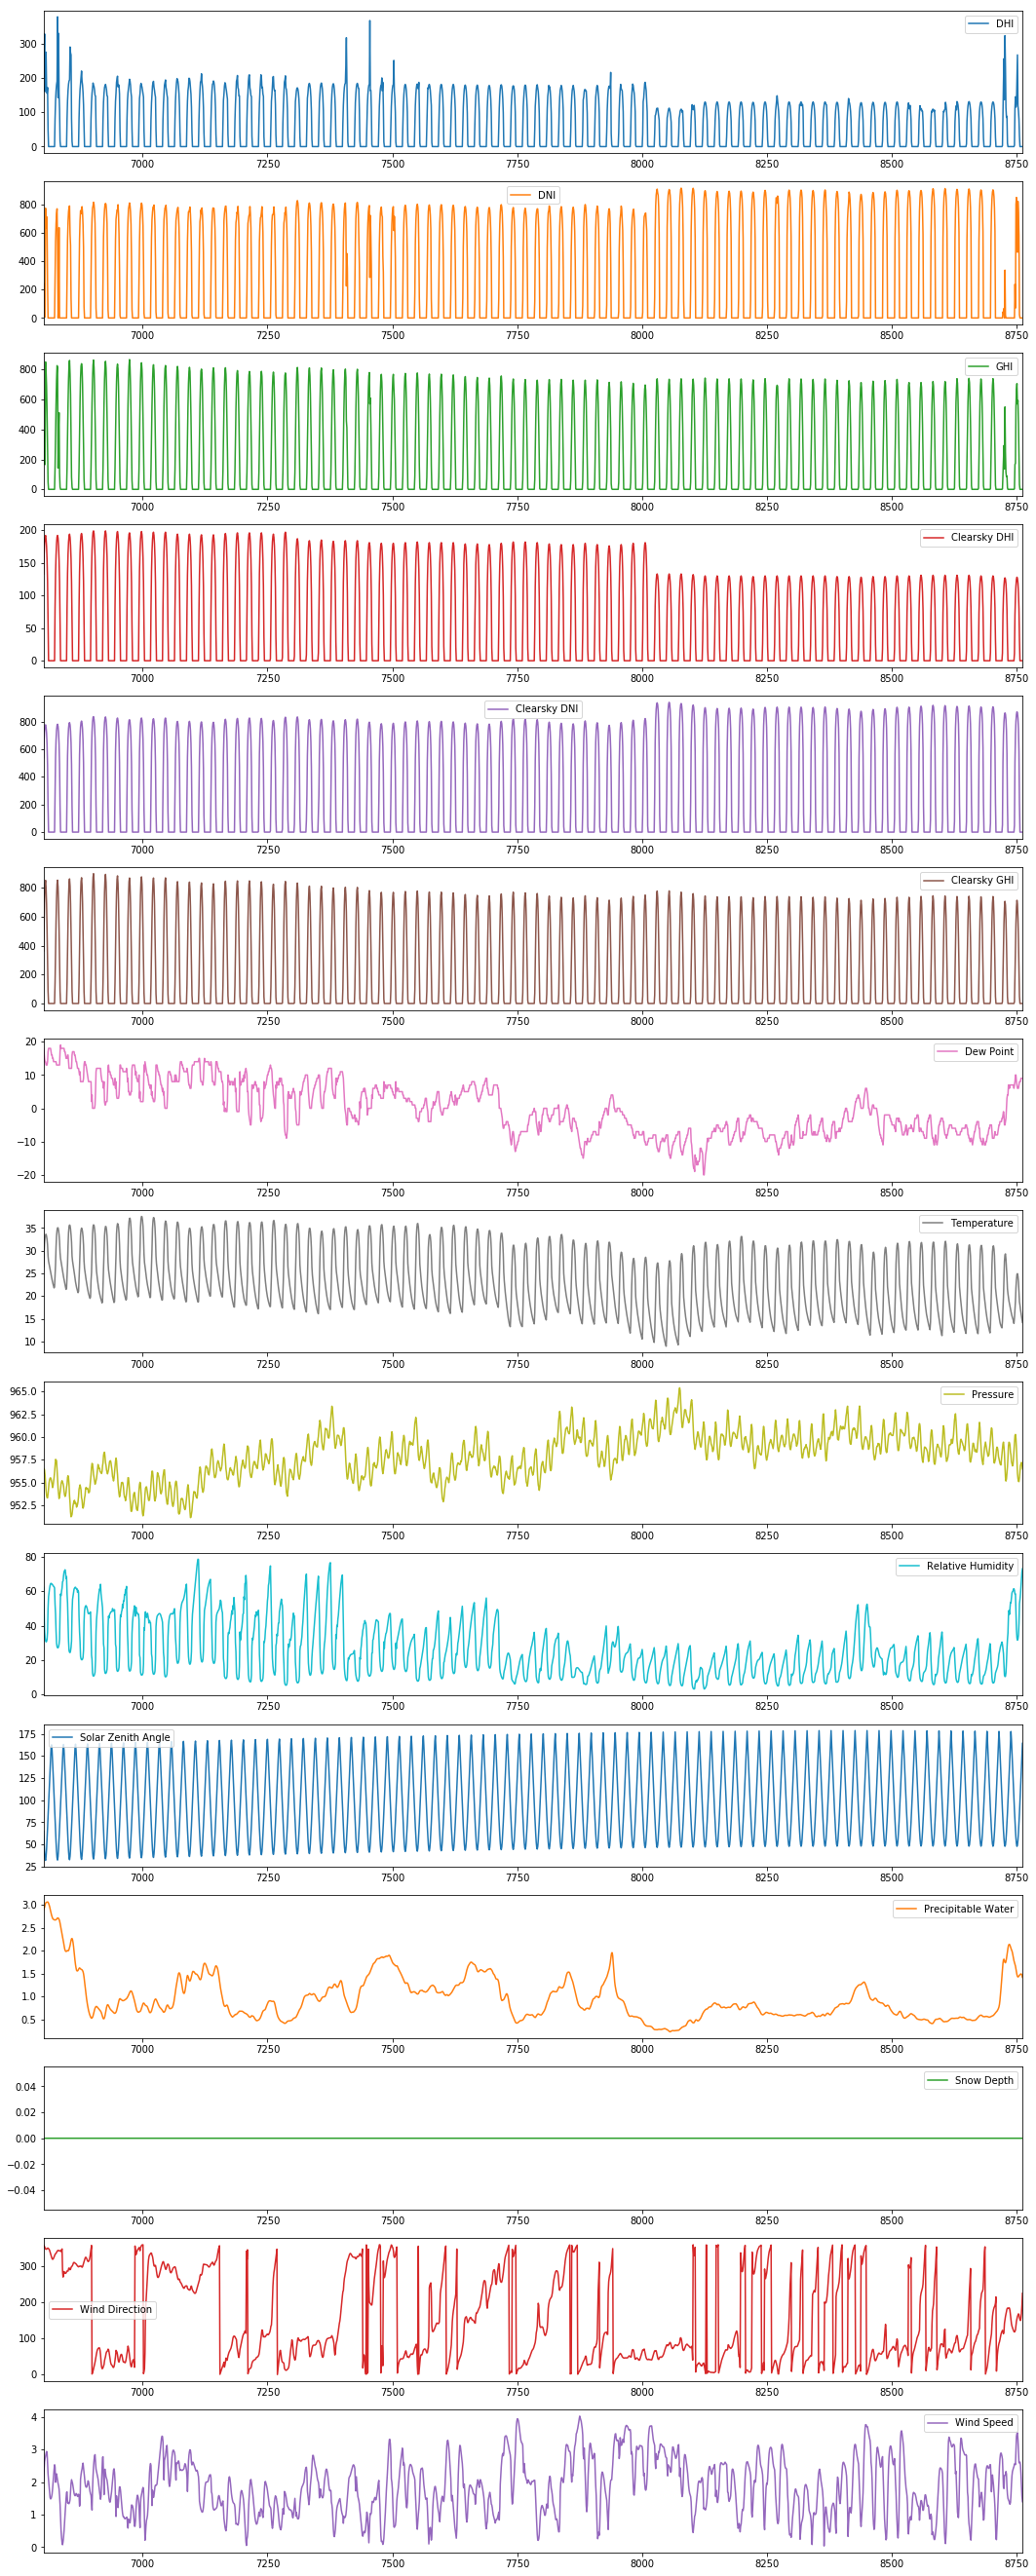

In [85]:
df_plot = new_df_imp[6800:]
fig, ax = plt.subplots(figsize=(18,48))
df_plot.plot(ax=ax,subplots=True)
ax.grid(False)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
plt.show()

### Correlation plot 


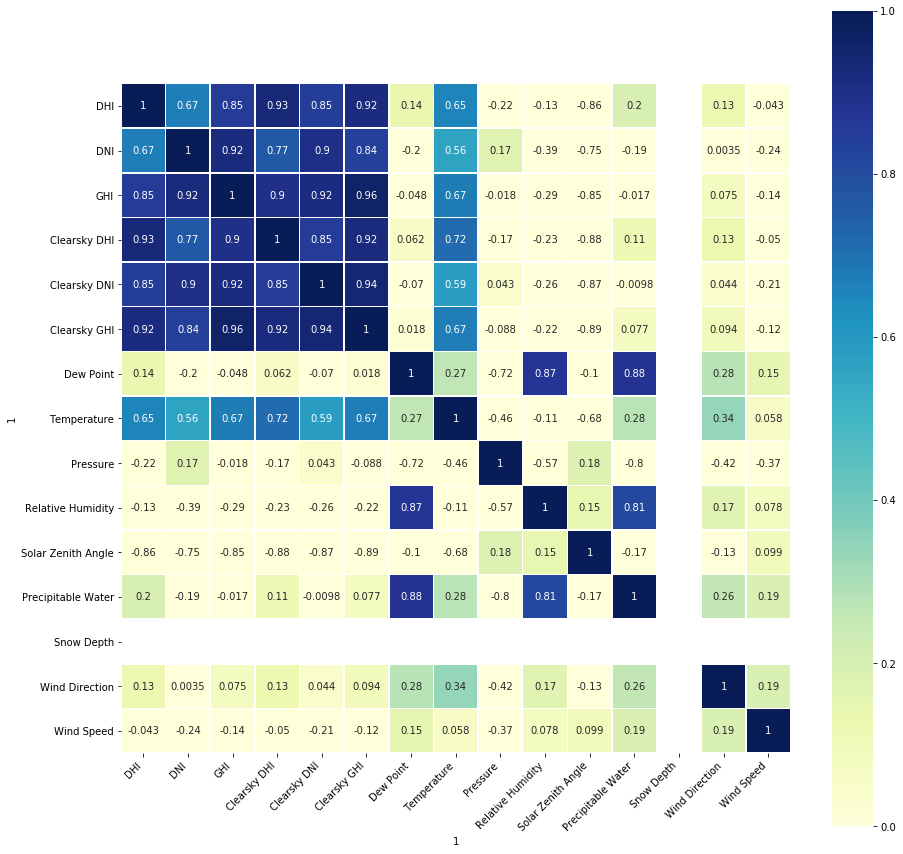

In [103]:
fig , ax = plt.subplots(figsize=(15,15))
corr = new_df_imp.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1,
    square=True,
    cmap="YlGnBu",
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

These type of plots help us to figure out the best parameter to choose for training

### Histograms

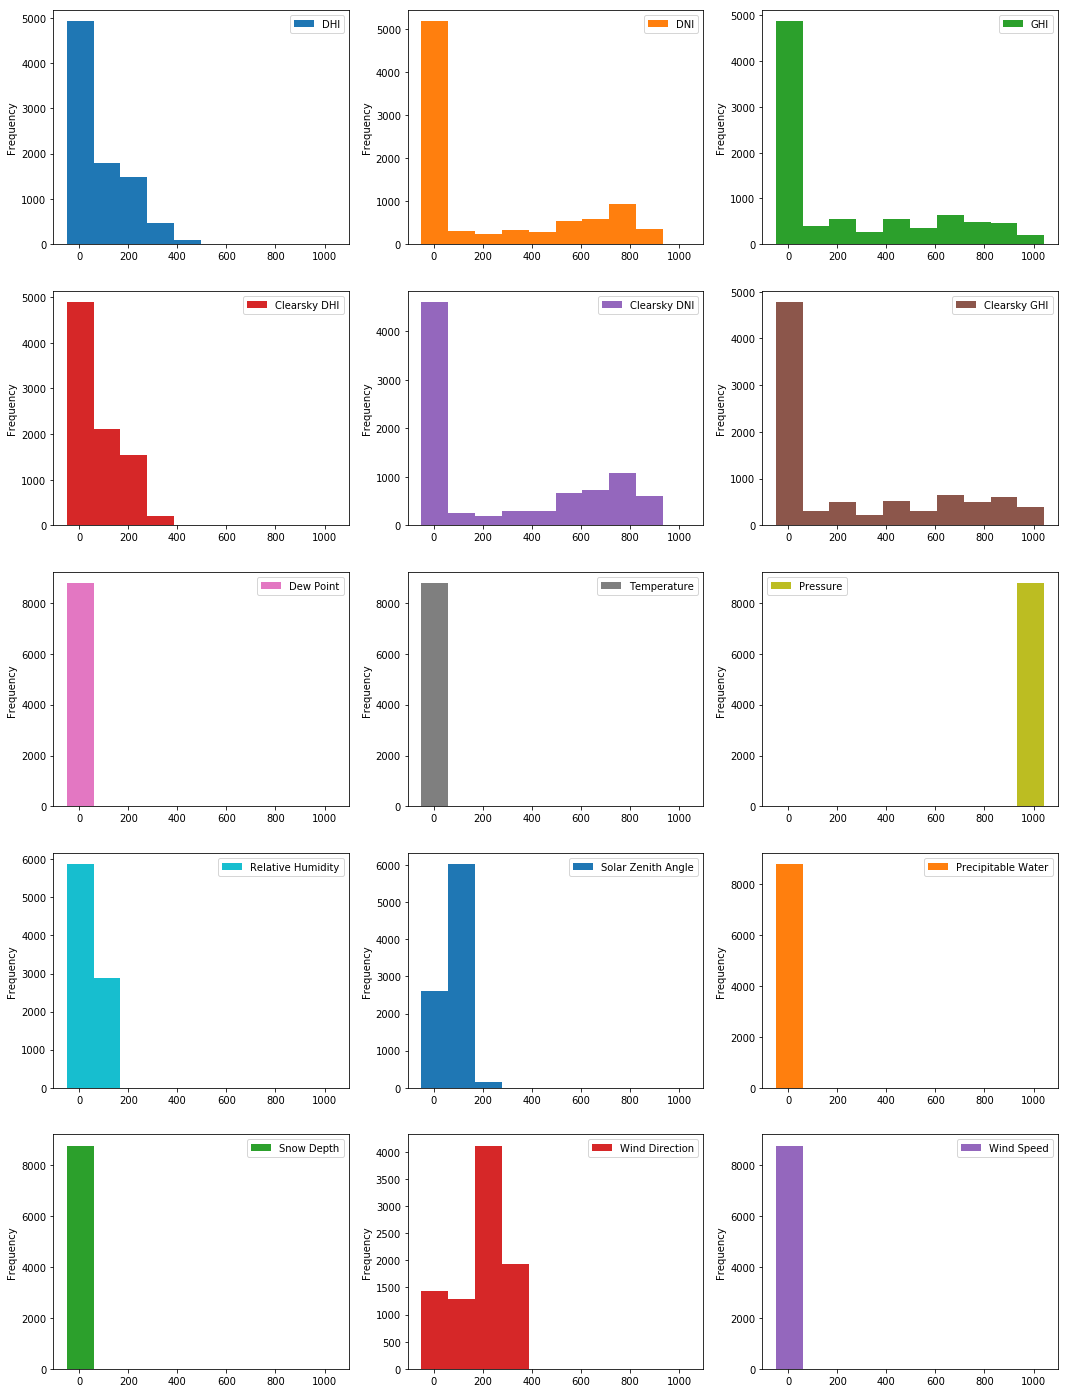

In [110]:
df_plot = new_df_imp
fig, ax = plt.subplots(ncols=3,nrows=5,figsize=(18,25))
df_plot.plot(ax=ax,subplots=True,kind="hist",grid=False)
plt.show()

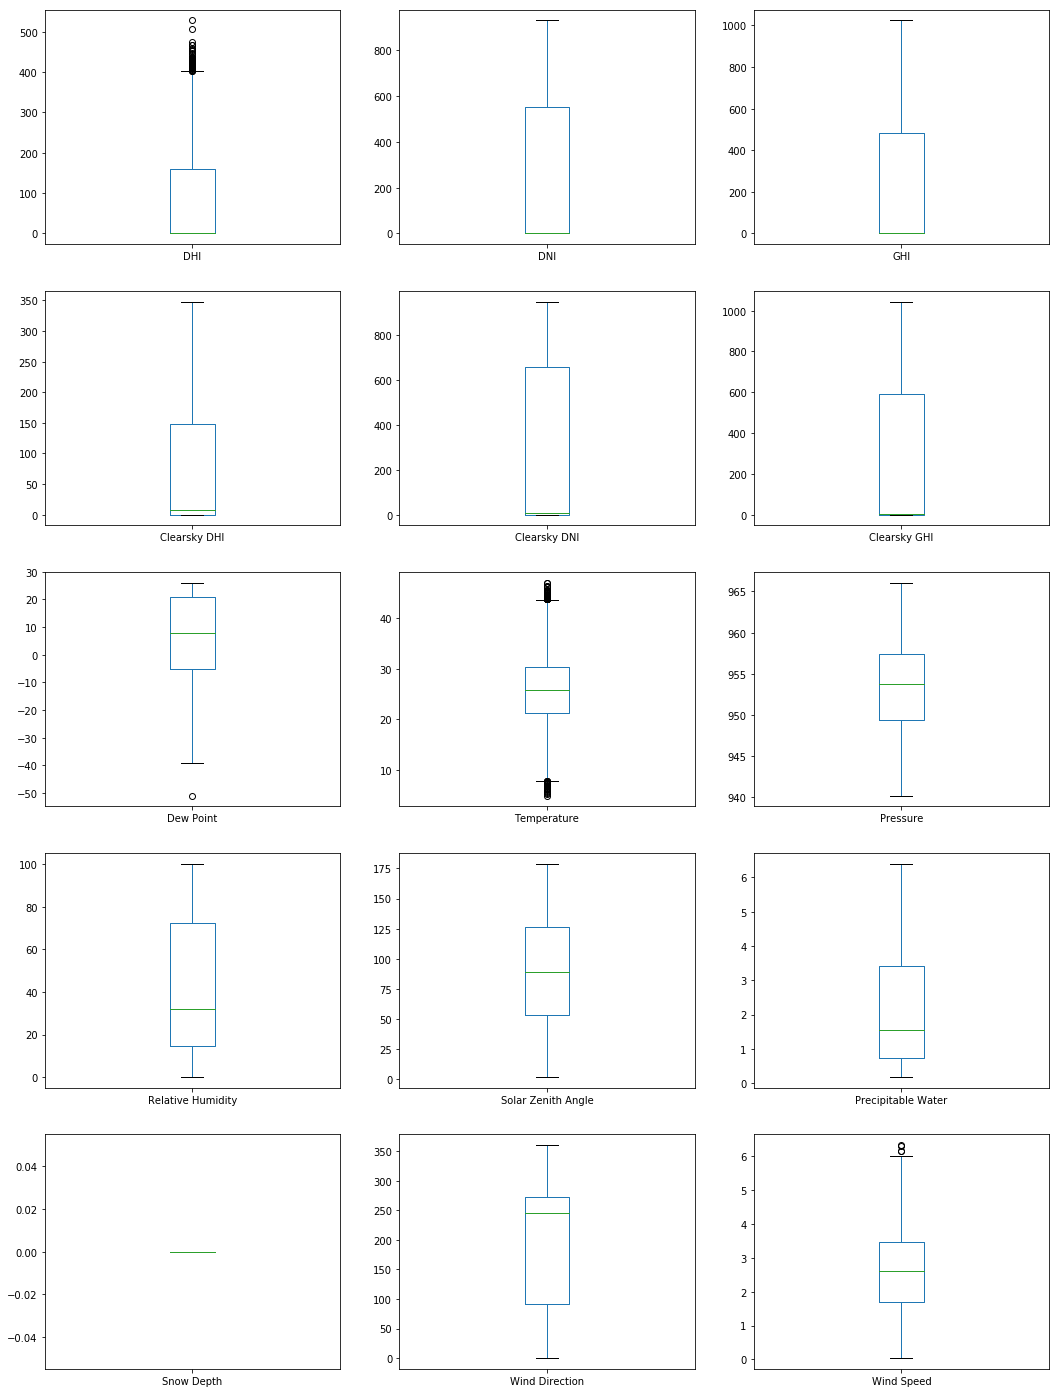

In [111]:
df_plot = new_df_imp
fig, ax = plt.subplots(ncols=3,nrows=5,figsize=(18,25))
df_plot.plot(ax=ax,subplots=True,kind="box",grid=False)
plt.show()

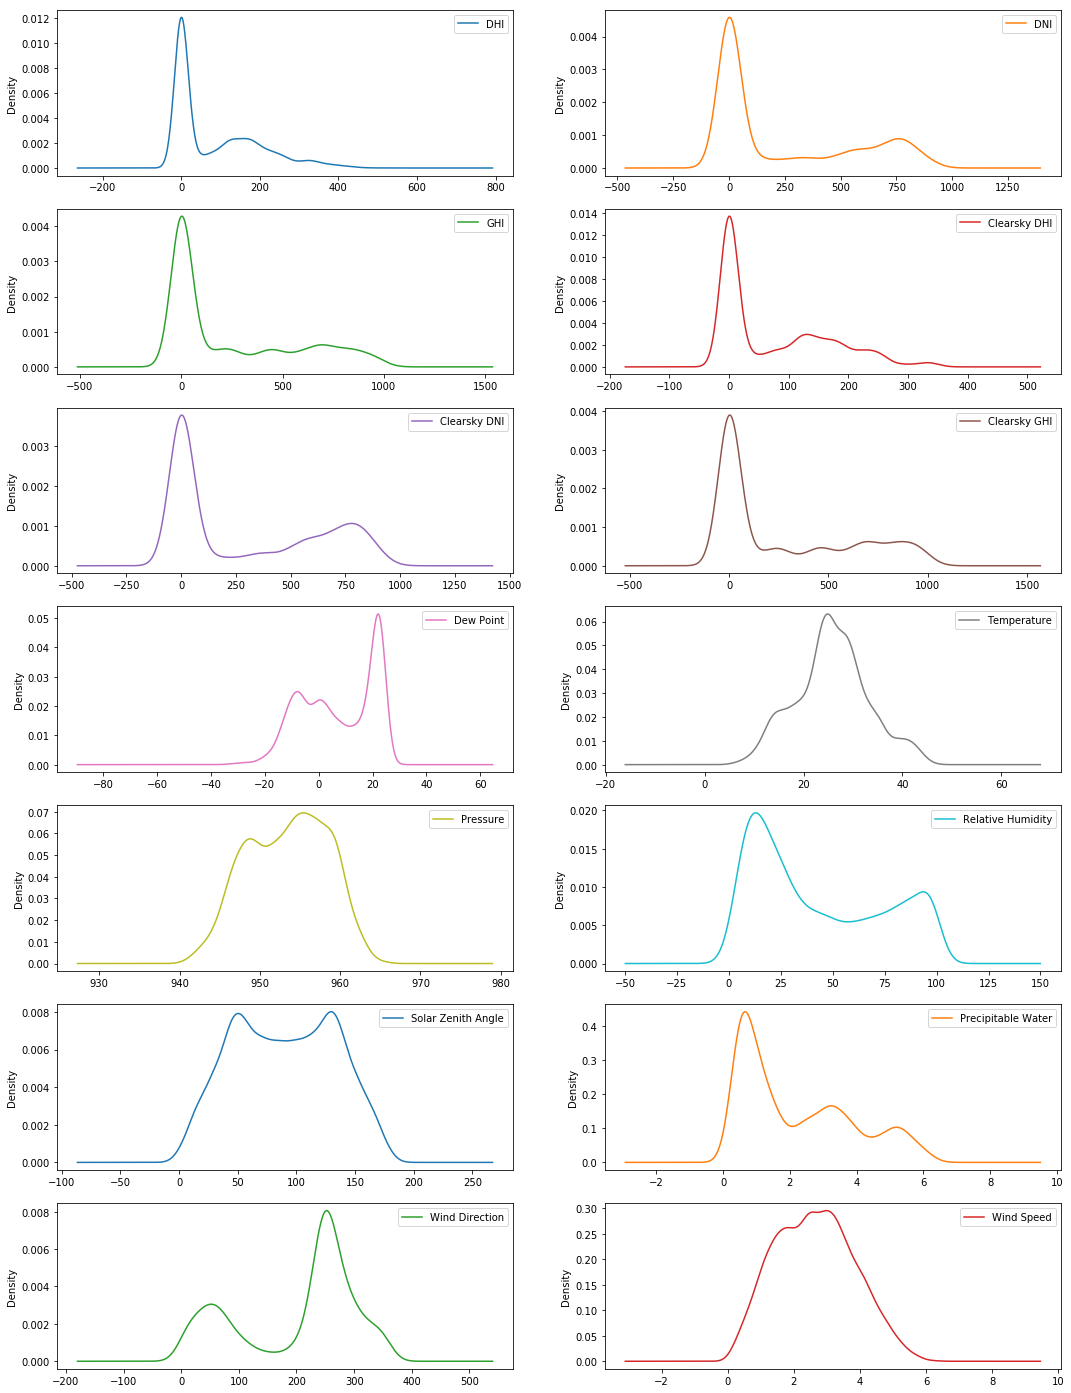

In [114]:
df_plot = new_df_imp.drop(columns=['Snow Depth'])
fig, ax = plt.subplots(ncols=2,nrows=7,figsize=(18,25))
df_plot.plot(ax=ax,subplots=True,kind="kde",grid=False)
plt.show()